In [45]:
# 1. DATA EXPLORATION

In [31]:
#Loading the Dataset
import pandas as pd
df = pd.read_csv(r"C:\Users\Abigail\Downloads\PaySim.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
#The last 5 records on the Dataset
df = pd.read_csv(r"C:\Users\Abigail\Downloads\PaySim.csv")
df.tail()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [4]:
#Checking the Data Structure
#Viewing column names,data types and sample values
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04

In [13]:
#identify target variable
# In this case we have the columns isFraud where 0 is a legitimate transcation and 1 a fraudulent transaction.
print(df["isFraud"].value_counts(normalize=True)) 

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


In [6]:
#Checking the Target Variable Distribution.
#Count the number of Fraud vs Legitimate Transactions
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the dataset
df = pd.read_csv(r"C:\Users\Abigail\Downloads\PaySim.csv")

#Count the Fraud and Legitimate transactions
fraud_counts = df["isFraud"].value_counts()
print(fraud_counts)

#Percentage Dsitribution 
fraud_percentage = df["isFraud"].value_counts(normalize=True) * 100
print(fraud_percentage)



isFraud
0    6354407
1       8213
Name: count, dtype: int64
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


isFraud
0    6354407
1       8213
Name: count, dtype: int64
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


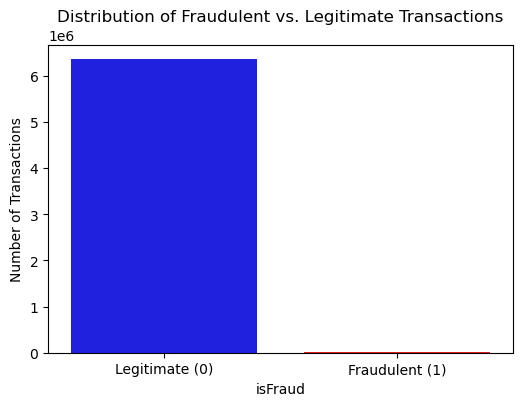

In [24]:
#Visualize the Distribution
# Plot distribution

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\Abigail\Downloads\PaySim.csv")

# Count the Fraud and Legitimate transactions
fraud_counts = df["isFraud"].value_counts()
print(fraud_counts)

# Percentage Distribution 
fraud_percentage = df["isFraud"].value_counts(normalize=True) * 100
print(fraud_percentage)

plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, hue=fraud_counts.index, palette=["blue", "red"], legend=False)
plt.xticks([0, 1], ["Legitimate (0)", "Fraudulent (1)"])
plt.ylabel("Number of Transactions")
plt.title("Distribution of Fraudulent vs. Legitimate Transactions")
plt.show()



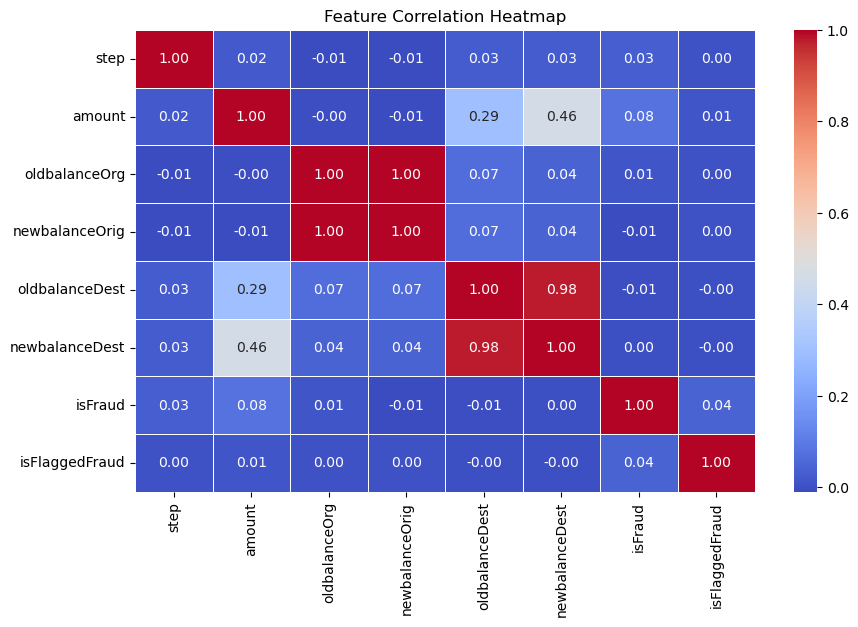

In [46]:
#Correlation using a Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Drop categorical columns before computing correlation
df_numeric = df.select_dtypes(include=["int64", "float64"])  

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


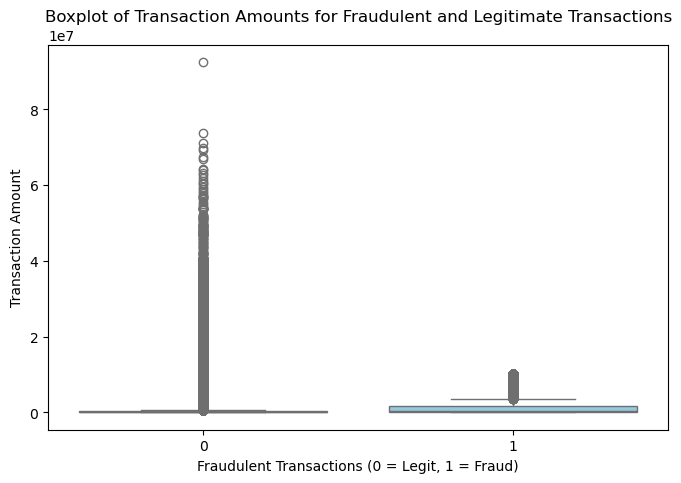

In [29]:
#Detect Outliers using a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["isFraud"], y=df["amount"], color="skyblue") 
plt.xlabel("Fraudulent Transactions (0 = Legit, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.title("Boxplot of Transaction Amounts for Fraudulent and Legitimate Transactions")
plt.show()

In [ ]:
# 2. DATA PREPROCESSING

In [34]:
#Data Cleaning

df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [32]:
#Handling missing values
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [41]:
#Data Cleaning
#Removing columns that won't be used in modeling, in this case nameOrig and nameDest

import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\Abigail\Downloads\PaySim.csv")

# Removing nameOrig and nameDest
df_cleaned = df.drop(columns=["nameOrig", "nameDest"])

# Check for missing values
print(df_cleaned.isnull().sum())  

# Fill missing values for numerical columns
numerical_columns = df_cleaned.select_dtypes(include=["float64", "int64"]).columns
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].fillna(df_cleaned[numerical_columns].median())

#Filling the non-numeric columns with the Most frequent value
non_numerical_columns = df_cleaned.select_dtypes(exclude=["float64", "int64"]).columns
df_cleaned[non_numerical_columns] = df_cleaned[non_numerical_columns].fillna(df_cleaned[non_numerical_columns].mode().iloc[0])

# Display the cleaned dataset
print(df_cleaned.head())



step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
   step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  
1             0.0        0               0  
2             0.0        1               0  
3             0.0        1               0  
4             0.0        0               0  


In [36]:
#Encoding with Categorical Variables

df_encoded = pd.get_dummies(df_cleaned, columns=["type"], drop_first=True)  
print(df_encoded.head())


   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  type_DEBIT  \
0             0.0        0               0          False       False   
1             0.0        0               0          False       False   
2             0.0        1               0          False       False   
3             0.0        1               0           True       False   
4             0.0        0               0          False       False   

   type_PAYMENT  type_TRANSFER  
0          True          False  
1          True          False  
2         False           True  
3         False     

In [47]:
#Feature Normalization

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Select numerical features for scaling 
numerical_features = df_encoded.select_dtypes(include=["float64", "int64"]).columns

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply scaling to the numerical features
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Display the normalized dataset
print(df_encoded.head())

# Split the data into features (X) and target (y)
X = df_encoded.drop(columns=["isFraud", "isFlaggedFraud"])  
y = df_encoded["isFraud"]  # Target variable

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes of the splits
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0   0.0  0.000106       0.002855        0.003233        0.000000   
1   0.0  0.000020       0.000357        0.000391        0.000000   
2   0.0  0.000002       0.000003        0.000000        0.000000   
3   0.0  0.000002       0.000003        0.000000        0.000059   
4   0.0  0.000126       0.000697        0.000603        0.000000   

   newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  type_DEBIT  \
0             0.0      0.0             0.0          False       False   
1             0.0      0.0             0.0          False       False   
2             0.0      1.0             0.0          False       False   
3             0.0      1.0             0.0           True       False   
4             0.0      0.0             0.0          False       False   

   type_PAYMENT  type_TRANSFER  
0          True          False  
1          True          False  
2         False           True  
3         False     